In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score




In [3]:
# Use your own file path if needed
df = pd.read_csv('/Users/suparnac/dev_envs/wiremetrics_internship/Bank_Personal_Loan_Modelling.csv')
print("First five rows:")
display(df.head())
print(f"Shape: {df.shape}")


First five rows:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Shape: (5000, 14)


In [5]:
# Remove ID and ZIP Code (not useful for prediction)
df = df.drop(["ID", "ZIP Code"], axis=1)

# Check nulls
print("Missing values by column:")
print(df.isnull().sum())


Missing values by column:
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


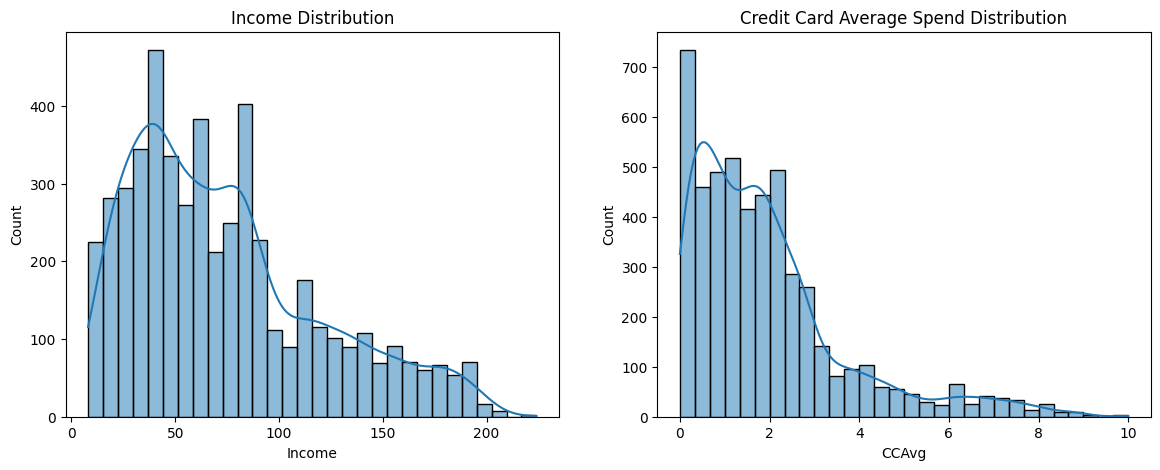

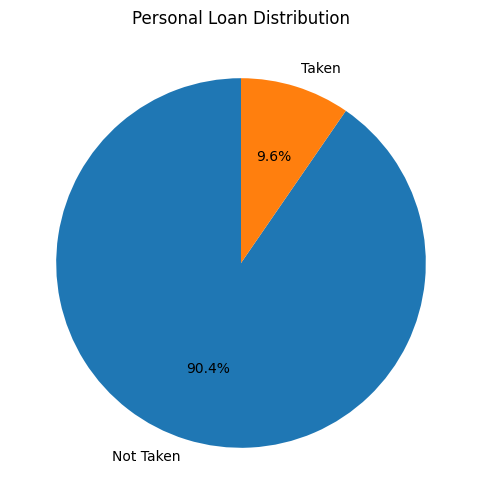

In [6]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df["Income"], bins=30, kde=True)
plt.title("Income Distribution")

plt.subplot(1,2,2)
sns.histplot(df["CCAvg"], bins=30, kde=True)
plt.title("Credit Card Average Spend Distribution")
plt.show()

plt.figure(figsize=(6,6))
df['Personal Loan'].value_counts().plot.pie(labels=["Not Taken", "Taken"], autopct='%1.1f%%', startangle=90)
plt.title('Personal Loan Distribution')
plt.ylabel("")
plt.show()


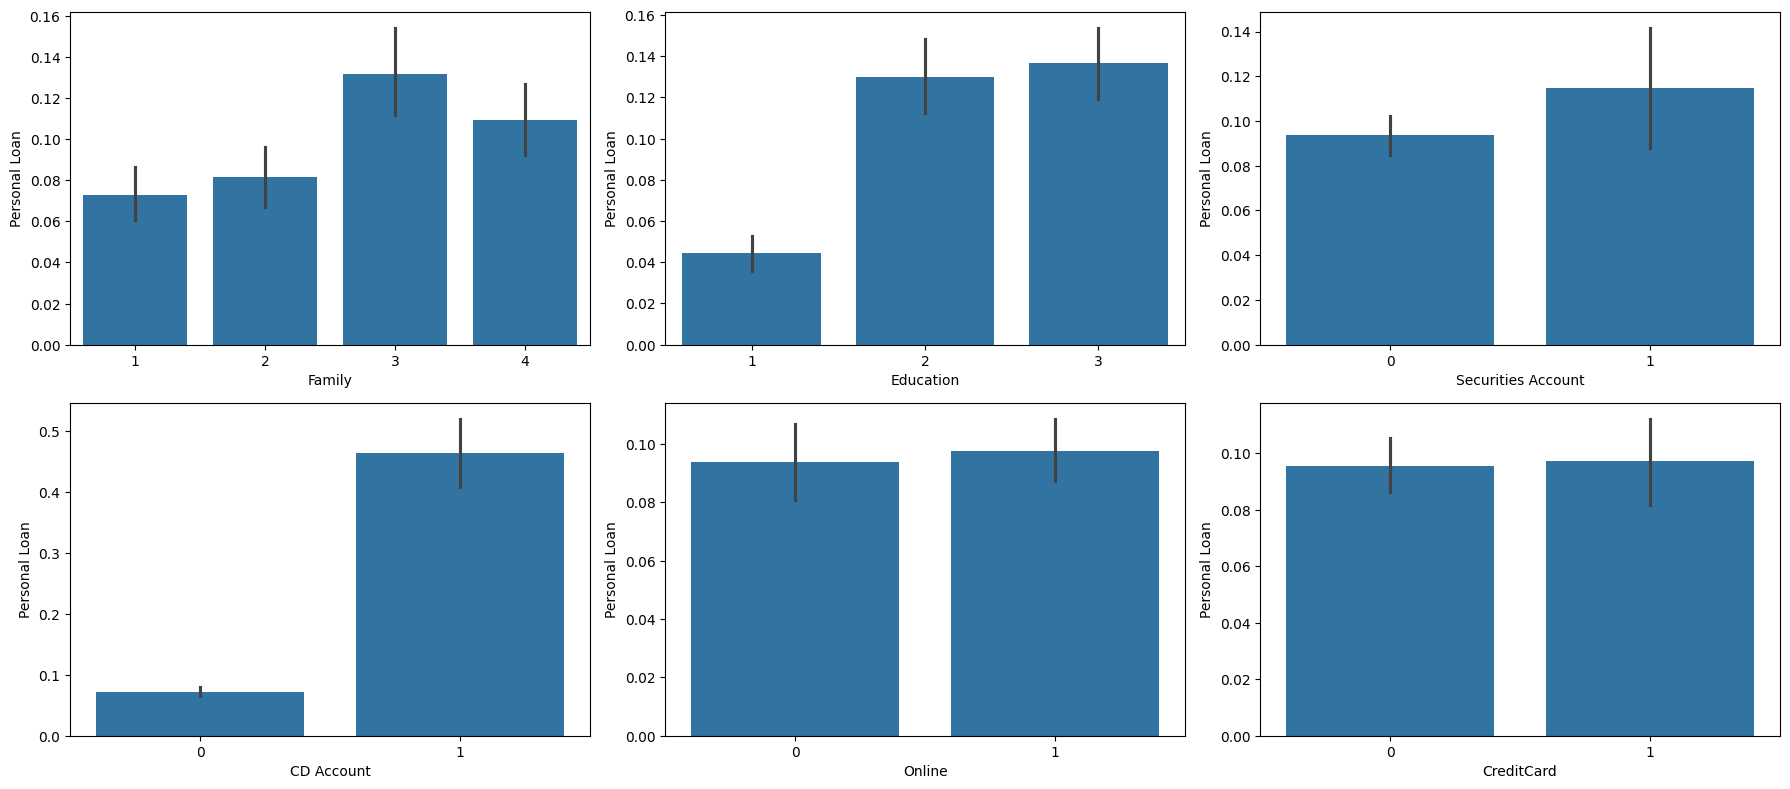

In [7]:
categorical = ["Family", "Education", "Securities Account", "CD Account", "Online", "CreditCard"]
plt.figure(figsize=(18,8))
for i, col in enumerate(categorical, 1):
    plt.subplot(2,3,i)
    sns.barplot(x=col, y="Personal Loan", data=df)
plt.tight_layout()
plt.show()


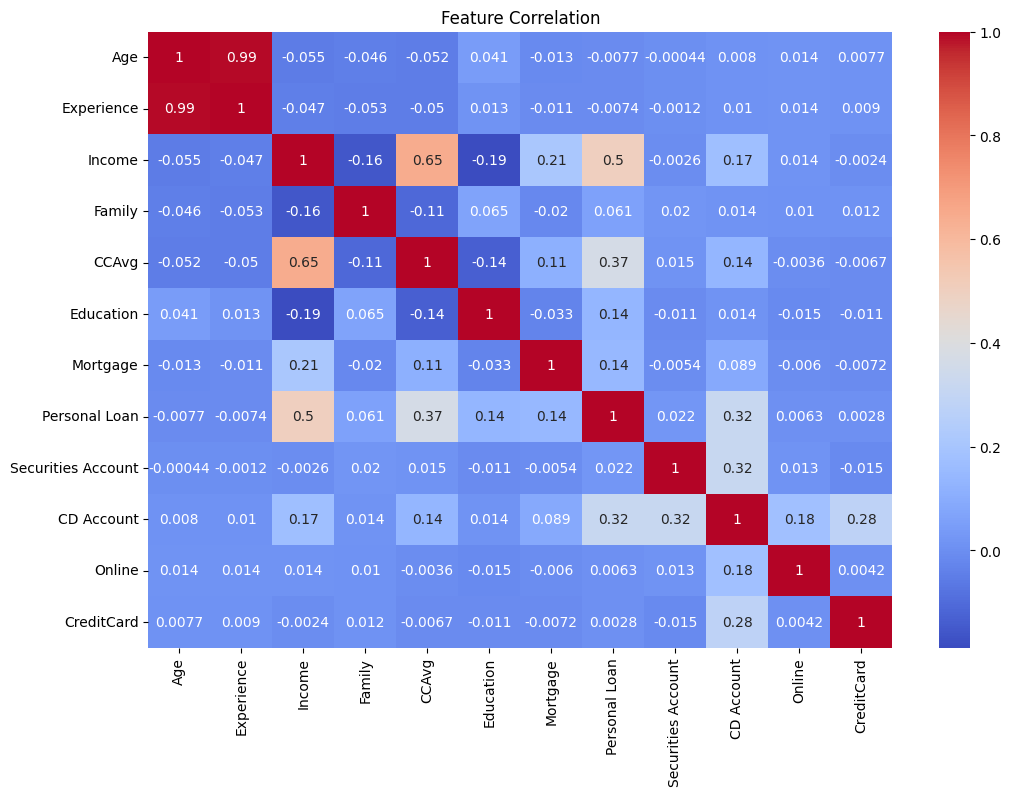

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [9]:
X = df.drop("Personal Loan", axis=1)
y = df["Personal Loan"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
results = {}

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results['Logistic Regression'] = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_lr)
]

# Decision Tree
dt = DecisionTreeClassifier(max_depth=8, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results['Decision Tree'] = [
    accuracy_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_dt)
]

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]

print("Model Comparison Table:")
print(pd.DataFrame(results, index=['Accuracy','Precision','Recall','F1-Score']).T)


Model Comparison Table:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.955   0.831169  0.666667  0.739884
Decision Tree           0.984   0.900000  0.937500  0.918367
Random Forest           0.992   0.978261  0.937500  0.957447


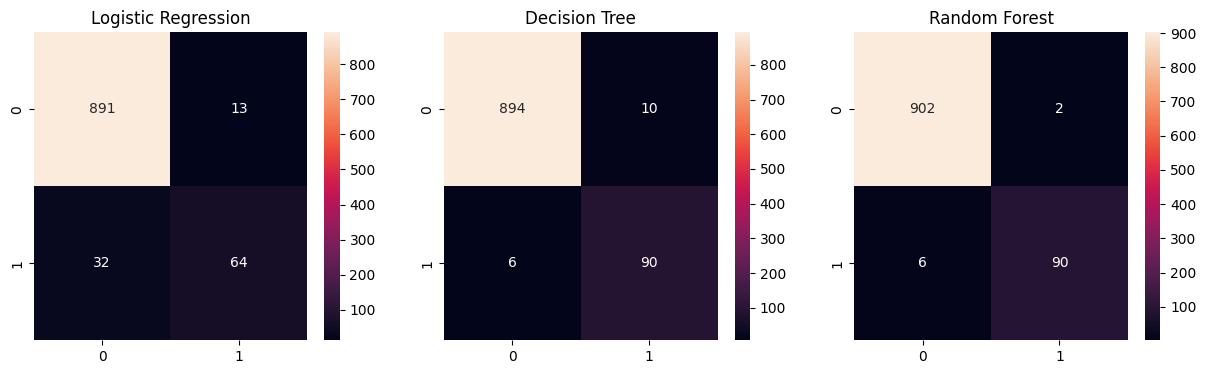

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.98      0.94      0.96        96

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=axs[0])
axs[0].set_title('Logistic Regression')

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Decision Tree')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axs[2])
axs[2].set_title('Random Forest')
plt.show()

print(classification_report(y_test, y_pred_rf))
# Choose the best model by F1-score for business deployment
